In [15]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data_Hough_coef = nc.Dataset('/Users/changyichieh/Documents/Hot Jupiter/Hough_coeff_200001010000000.nc')
data_Hough_coef

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title:  MODES: Hough coefficients
    info: The complex Hough expansion coefficients, given separately for EIG, WIG and BAL modes, REAL and IMAG parts
    creation_date: 19-01-2024    11:06:51
    Conventions: None
    support: http://meteo.fmf.uni-lj.si/MODES/
    grant_id: European Research Council, Grant Agreement no. 28015
    project: MODES
    reference: Zagar et. al. (2015), Geosci. Model Dev., 8, 1169-1195
    reference_doi: doi:10.5194/gmd-8-1169-2015
    dimensions(sizes): n(30), m(20), k(41), Re+Im(2), time(1)
    variables(dimensions): float64 n(n), float64 m(m), float64 k(k), float64 time(time), float64 EIG(time, Re+Im, k, m, n), float64 WIG(time, Re+Im, k, m, n), float64 BAL(time, Re+Im, k, m, n)
    groups: 

## Check inverse (Plot)

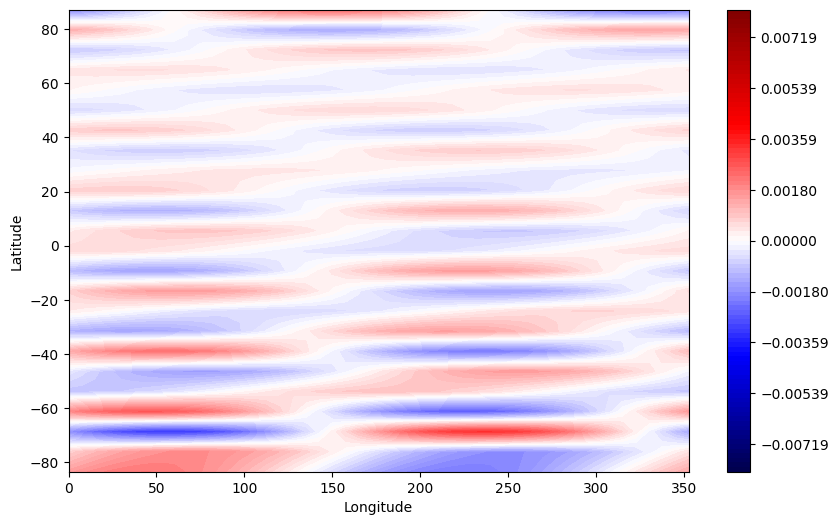

In [75]:
data_inverse  = nc.Dataset('/Users/changyichieh/Documents/Hot Jupiter/Erai_allk_200001010000000.nc')

# Draw the input data u,v and z and return the u and v as arrays
def draw_uvz_all(height,normalize,data_in):
    '''draw the average uvz (all)'''
    inver = data_in
    lon, lat = np.meshgrid(inver.variables['lon'][::2], inver.variables['lat'][::2])
    u = inver.variables['u'][0][height]
    v = inver.variables['v'][0][height]
    z = inver.variables['Z'][0][height]
    newu = np.array(u)[::2, 1::2]
    newv = np.array(v)[::2, 1::2]
    newz = z[::2, 1::2]
    if normalize == False:
        zmin, zmax = np.amin(inver.variables['Z'][0][height]), np.amax(inver.variables['Z'][0][height])
    else:
        zmin, zmax = np.amin(inver.variables['Z'][0]), np.amax(inver.variables['Z'][0])
  
    levels = np.linspace(zmin, zmax, 101)
    plt.figure(figsize=(10, 6))
    cp = plt.contourf(lon, lat, newz,  cmap='seismic', levels=levels)
    plt.colorbar(cp)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
 
    # plt.quiver(lon, lat, newu, newv, pivot='mid', headwidth=3, scale=350, minshaft=2)
    return

for i in [24]:
    draw_uvz_all(i,False,data_inverse)

# Check inverse (Sum)
- In the code :
  - $m$ is vertical wave number
  - $n$ is meridional wave number
  - $k$ is zonal wave number
- for $k=1$ (diurnal), sum up all $n$
  - the index of $k=1$ is 0
  - We use `hough.wn00000.nc` to get the HSF

In [25]:
HSF = nc.Dataset('/Users/changyichieh/Documents/Hot Jupiter/hough.wn00000.nc')
HSF

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title:  MODES: Horizontal Structure Functions
    Conventions: None
    support: http://meteo.fmf.uni-lj.si/MODES/
    grant_id: European Research Council, Grant Agreement no. 28015
    project: MODES
    reference: Zagar et. al. (2015), Geosci. Model Dev., 8, 1169-1195
    reference_doi: doi:10.5194/gmd-8-1169-2015
    houghcalc_cnf: values follow
    szw: 0
    ezw: 40
    maxl: 30
    my: 48
    ks_mode: K
    freq_fname: ../../NMF_DATABASE/hough/freq.data
    dimensions(sizes): num_vmode(20), uvz(3), my(48), maxl(30)
    variables(dimensions): int32 num_vmode(num_vmode), int32 uvz(uvz), int32 my(my), int32 maxl(maxl), float64 EIG(num_vmode, uvz, my, maxl), float64 WIG(num_vmode, uvz, my, maxl), float64 BAL(num_vmode, uvz, my, maxl), float64 lat(my)
    groups: 

In [24]:


# for the first vertical mode 

# EIG[time=0][Realpart=0][diurnal=0][first vertical mode=0]
data_Hough_coef.variables['EIG'][0][0][0][0]

HSF.variables['EIG'][0][2]






# care about the 'Z'

# HSF.variables['Z']


# sum_n = np.zeros(len(data_Hough_coef.variables['m']))

# for i in range(len(data_Hough_coef.variables['m'])):
    # sum_n[i] = i

masked_array(data=[ 0.00000000e+00,  9.34256603e-17,  3.39074841e-16,
                    5.90239155e-18,  8.05777257e-17, -1.08307857e-17,
                   -2.38872702e-17,  2.28532242e-17, -4.02150223e-18,
                    7.83763168e-18, -7.47867206e-18, -3.38936904e-18,
                   -3.55432924e-19, -3.00409660e-18,  2.93166782e-18,
                   -2.24036045e-18, -5.61166145e-20,  1.12168026e-19,
                    1.05610722e-19,  1.24104360e-19, -1.78124142e-19,
                    1.86326497e-19, -2.99879432e-19,  1.86059200e-19,
                   -3.58359639e-20,  5.10197700e-20, -1.66864661e-20,
                   -7.67181262e-20,  3.53139578e-20,  6.63515103e-21],
             mask=False,
       fill_value=1e+20)